In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv(r"E:\Praxis-BA-18\Term-3\TXAN\Twitter\train_E6oV3lV.csv")

In [3]:
train.shape

(31962, 3)

In [4]:
test=pd.read_csv(r"E:\Praxis-BA-18\Term-3\TXAN\Twitter\test_tweets_anuFYb8.csv")

In [5]:
test.shape

(17197, 2)

In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
both=train.append(test,ignore_index=True)

In [8]:
both.shape

(49159, 3)

In [9]:
import re

In [10]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text) ## regular expression
    for i in r:
        input_text=re.sub(i,'',input_text)
    return input_text

In [11]:
##Remove twitter handels @user
both['cl_data']=np.vectorize(remove_pattern)(both['tweet'],"@[\w]*")

In [12]:
both.head()

,id,label,tweet,cl_data
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
##Removing Punctuations, Numbers, and Special Characters

both['cl_data']=both['cl_data'].str.replace("[^a-zA-Z#]"," ")

In [14]:
both['cl_data']=both['cl_data'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
both.head()

,id,label,tweet,cl_data
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [16]:
## Tokenization

In [17]:
from nltk.tokenize import WhitespaceTokenizer

In [18]:
token=WhitespaceTokenizer()

In [19]:
data=both['cl_data']

In [20]:
data.head()

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cause they offer wheelchai...
2                                  bihday your majesty
3                           #model love take with time
4                       factsguide society #motivation
Name: cl_data, dtype: object

In [21]:
tokenized_tweet=data.apply(lambda x: x.split())

In [22]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: cl_data, dtype: object

In [23]:
##words=pd.DataFrame(words)

In [24]:
##Stemming

In [25]:
from nltk.stem.porter import *

In [26]:
stemmer = PorterStemmer()

In [27]:
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [28]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

both['cl_data'] = tokenized_tweet

In [29]:
tokenized_tweet.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: cl_data, dtype: object

In [30]:
both['cl_data']=tokenized_tweet

In [31]:
both.head()

,id,label,tweet,cl_data
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [32]:
from collections import Counter

In [33]:
all_words = ' '.join([text for text in both['cl_data']])

In [34]:
from wordcloud import WordCloud

In [35]:
wc=WordCloud(width=800,height=500).generate(all_words)

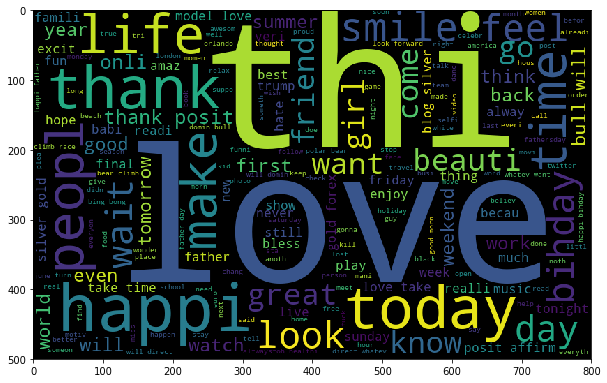

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 7))
plt.imshow(wc)

In [37]:
##for non-racist words

good_word=' '.join([text for text in both['cl_data'][both['label']==0]])

In [38]:
wc1=WordCloud().generate(good_word)

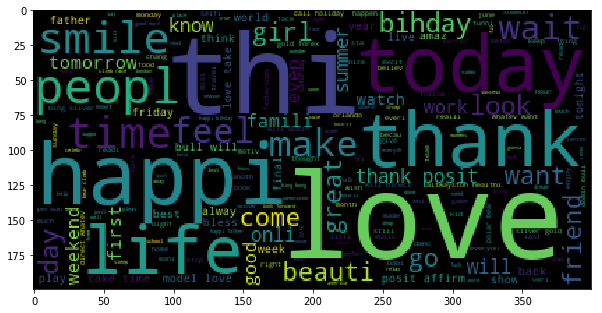

In [39]:
plt.figure(figsize=(10, 7))
plt.imshow(wc1)

In [40]:
## For bad words

bad_word=' '.join([text for text in both['cl_data'][both['label']==1]])

In [41]:
wc2=WordCloud().generate(bad_word)

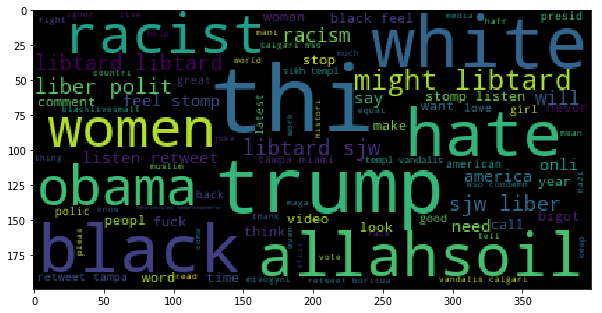

In [42]:
plt.figure(figsize=(10, 7))
plt.imshow(wc2)

In [43]:
##hashtagging of words

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [44]:
HT_good = hashtag_extract(both['cl_data'][both['label'] == 0])
HT_bad=hashtag_extract(both['cl_data'][both['label']==1])

In [45]:
HT_good

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [46]:
HT_bad

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [47]:
HT_good=sum(HT_good,[])

In [48]:
HT_bad=sum(HT_bad,[])

In [49]:
HT_good

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [50]:
HT_bad

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [51]:
##Extracting features from cleaned-tweet

from sklearn.feature_extraction.text import CountVectorizer

In [52]:
bow=CountVectorizer(stop_words='english')

In [53]:
bow_mat=bow.fit_transform(both['cl_data'])

In [54]:
bow

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [55]:
bow_mat

<49159x40053 sparse matrix of type '<class 'numpy.int64'>'
	with 309524 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf=TfidfVectorizer(stop_words='english')

In [58]:
tfidf_mat=tfidf.fit_transform(both['cl_data'])

In [59]:
tfidf_mat

<49159x40053 sparse matrix of type '<class 'numpy.float64'>'
	with 309524 stored elements in Compressed Sparse Row format>

In [60]:
##Model Building

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [62]:
train_bow=bow_mat[:31962,:]
test_bow=bow_mat[31962:,:]

In [63]:
test_bow.shape

(17197, 40053)

In [64]:
train_bow.shape

(31962, 40053)

In [66]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [67]:
lr=LogisticRegression()

In [68]:
lr.fit(xtrain_bow,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
predict=lr.predict_proba(xvalid_bow)

In [70]:
predict

array([[ 0.998907  ,  0.001093  ],
       [ 0.98888855,  0.01111145],
       [ 0.94700686,  0.05299314],
       ..., 
       [ 0.96797048,  0.03202952],
       [ 0.43978522,  0.56021478],
       [ 0.98329336,  0.01670664]])

In [71]:
final_pred=predict[:,1]>=0.3

In [72]:
final_pred=final_pred.astype(np.int)

In [73]:
final_pred

array([0, 0, 0, ..., 0, 1, 0])

In [100]:
f1_score(yvalid, final_pred)

0.65514403292181078

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini', min_samples_leaf=5,max_features='auto',oob_score=True, random_state=1,n_jobs=-1)
rf.fit(xtrain_bow,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [106]:
ypred=rf.predict(X=xvalid_bow)

In [107]:
f1_score(yvalid,ypred)

0.33775633293124246

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
nb_classifier = MultinomialNB()

In [124]:
nb_classifier.fit(xtrain_bow,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [125]:
nb_pred=nb_classifier.predict(xvalid_bow)

In [126]:
f1_score(yvalid,nb_pred)

0.5447963800904978

In [130]:
from sklearn import svm

In [131]:
clf=svm.SVC()

In [132]:
clf.fit(xtrain_bow,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [133]:
clf_pred=clf.predict(xvalid_bow)

In [135]:
clf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
f1_score(yvalid,clf_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [75]:
test_pred=lr.predict_proba(test_bow)

In [76]:
len(test_pred)

17197

In [77]:
test_pred

array([[  9.44225914e-01,   5.57740861e-02],
       [  8.20487429e-01,   1.79512571e-01],
       [  9.96533559e-01,   3.46644104e-03],
       ..., 
       [  9.19686341e-01,   8.03136595e-02],
       [  9.99074932e-01,   9.25068473e-04],
       [  9.89799751e-01,   1.02002492e-02]])

In [79]:
test_pred=test_pred[:,1]>=0.3

In [80]:
test_pred=test_pred.astype(np.int)

In [81]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
len(test_pred)

17197

In [83]:
test['label']=test_pred

In [84]:
submission = test[['id','label']]

In [85]:
submission.to_csv(r'E:\Praxis-BA-18\Term-3\TXAN\Twitter\sub.csv')

In [86]:
## TFIDF

In [90]:
train_tfidf=tfidf_mat[:31962,:]
test_tfidf=tfidf_mat[31962:,:]

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

In [92]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
pred_tf=lr.predict_proba(xtest)

In [94]:
pred_tf

array([[ 0.96776209,  0.03223791],
       [ 0.96156907,  0.03843093],
       [ 0.82230977,  0.17769023],
       ..., 
       [ 0.95018356,  0.04981644],
       [ 0.68527328,  0.31472672],
       [ 0.95006122,  0.04993878]])

In [95]:
pred_tf=pred_tf[:,1]>0.3

In [96]:
pred_tf

array([False, False, False, ..., False,  True, False], dtype=bool)

In [97]:
pred_tf.astype(int)

array([0, 0, 0, ..., 0, 1, 0])

In [98]:
len(pred_tf)

9589

In [99]:
f1_score(ytest,pred_tf)

0.56327307326355858

In [127]:
nb_classifier.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [128]:
pred_nb=nb_classifier.predict(xtest)

In [129]:
f1_score(ytest,pred_nb)

0.17112299465240641